<a href="https://colab.research.google.com/github/vennela28/MLnow_2.0/blob/main/Univariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Date**: 7 June 2021

**Topic**: Univariate Linear Regression

**Author**: Vennela Sunnam

[Assessment Repository](https://github.com/vennela28/MLnow_2.0)


**Univariate analysis**

Univariate analysis is the simplest type of analyzing data which considers only 1 feature in our dataset and classify the points with respect to the output of the dataset. 




***Linear Regression***

Linear Regression is a regression algorithm which has a response variable belonging to real values. 

Linear Regression is all about finding the best hyperplane that best fits the given data.

Given 'x' predict 'y'. 


**Logistic Regression**

Logistic Regression is a *classification* algorithm even if the name says "regression".

Logistic Regression can perform only binary classification unlike KNN and Naive Bayes.

***Logistic Regression is all about finding the best hyperplane to seperate the positive points from the negative points***. 


**Assumption**: 

The classes are almost/perfectly linearly separable.

There are various ways to find the best plane:
1. Geometry & Simple Algebra
2. Probability: Gaussian Naive Bayes
3. Loss minimization

The hyperplane is ${\pi}$ with normal w where the hyperplane is w* = argmax ($\sum_{i=0}^n \ y_iw^Tx_i$) where $y_i$ is the class of the point and $w^Tx_i$ is the distance between the point and the hyperplane.

*Our objective is to find w that maximises sum of signed distances.*

But maximizing the sum of signed distances is not outlier prone. We use *squashing*. Squashing is accomplished by using **sigmoid function** between [0, 1].

Sigmoid function has a *probabilistic behavior* and has a tapering behavior when $w^Tx_i$ is **large** and linear behavior when $w^Tx_i$ is **small**.

The optimal hyperplane using geometry is **w* = argmin ($\sum_{i=1}^n \ log(1 + \exp(-y_iw^Tx_i)$)**.

Probabilistic Method: **w* = argmin ($\sum_{i=0}^n - y_i log P_i - (1 - y_i) log(1 - P_i)$)**.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/Univariate_Linear_Regression'

/content/drive/MyDrive/Univariate_Linear_Regression


In [ ]:
ls

 bank.csv                           rating.csv
'bestsellers with categories.csv'   StudentsPerformance.csv
 Company.csv                        Tweet.csv
 Company_Tweet.csv                  Univariate_Linear_Regression.ipynb
 IMDB-Movie-Data.csv


In [ ]:
import pandas as pd #work with csv or excel files
import numpy as np #work with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

**Load the dataset into a pandas dataFrame**

In [ ]:
movies = pd.read_csv('IMDB-Movie-Data.csv', sep = ',')

**Find out the total number of datapoints and features in the dataset**

In [ ]:
print(movies.shape)

(1000, 12)


**Inspecting the dataset**

To find everything about the dataset you can use the info() method. This gives a detailed overview of the dataset with the total number of rows and columns, column names, index range, type of values in the columns and also specifies if any of the columns have null values.

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [ ]:
movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


**Rename the columns of the dataset**

In [ ]:
movies = movies.rename(columns = {'Revenue (Millions)': 'Revenue', 'Runtime (Minutes)':'Duration'})

**Check for null values in the dataset**

In [ ]:
movies.isnull().values.any()

True

If the dataset has some columns having null values, then it returns True else returns False.

Since the dataset has empty values, use dropna() to delete those specific rows in the dataset.

In [ ]:
movies = movies.dropna()

Check the total number of rows remaining in the dataset after deleting the rows with empty values.

In [ ]:
movies.shape

(838, 12)

In [ ]:
movies.isnull().values.any()

False

**Check for any duplicates in the dataset**

In [ ]:
movies[movies.duplicated()]

,Rank,Title,Genre,Description,Director,Actors,Year,Duration,Rating,Votes,Revenue,Metascore


Predict the `Rating` of the movie given generated `Revenue`.

We are just going to consider the columns `Rating` and `Revenue` to perform univariate linear regression.

$Rating_i = Revenue_i⋅θ_1+θ_0$

In [ ]:
charts = movies[['Revenue', 'Rating']]
charts.head()

,Revenue,Rating
0,333.13,8.1
1,126.46,7.0
2,138.12,7.3
3,270.32,7.2
4,325.02,6.2


In [ ]:
charts.to_csv('top_charts.csv')

**Data Visualization**

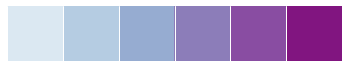

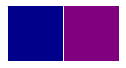

In [ ]:
import seaborn as sns
sns.palplot(sns.color_palette('BuPu')) #Blue to Purple colors
pal = sns.color_palette('BuPu', 7) #print 7 color shades from Blue to Purple
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#00008B', '#800080'] #Blue Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [ ]:
charts.columns

Index(['Revenue', 'Rating'], dtype='object')

**Pairplots**

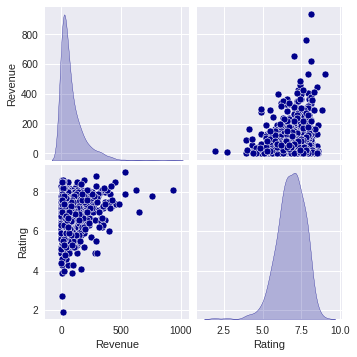

In [ ]:
#pairplot for all the values

sns.pairplot(charts,
             x_vars = ['Revenue', 'Rating'],
             y_vars =  ['Revenue', 'Rating'],
       diag_kind='kde'
       )

**Box Plots**

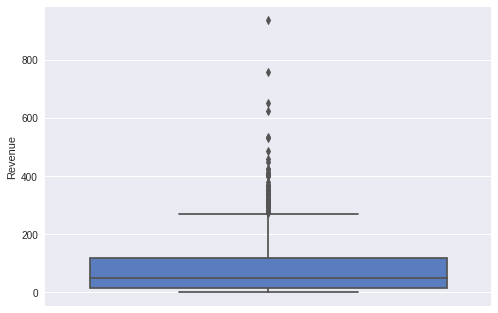

In [ ]:
sns.boxplot(y=charts['Revenue'],palette='muted')

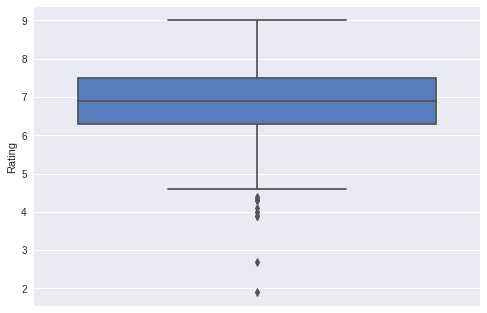

In [ ]:
sns.boxplot(y=charts['Rating'],palette='muted')

**Scatter Plot**

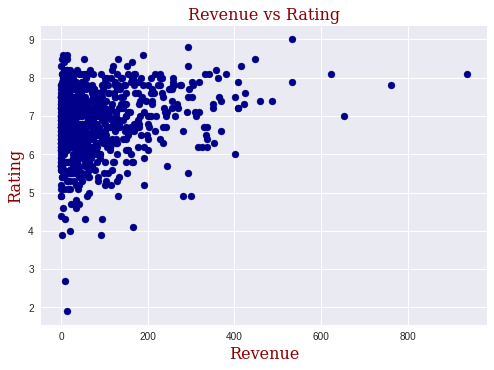

<Figure size 2880x2880 with 0 Axes>

In [ ]:
plt.grid(True)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
        
plt.scatter(charts['Revenue'],charts['Rating'])
plt.title('Revenue vs Rating',fontdict=font)
plt.xlabel('Revenue',fontdict=font)
plt.ylabel('Rating',fontdict=font)
plt.figure(figsize=(40,40))
plt.show()

**Violinplot**

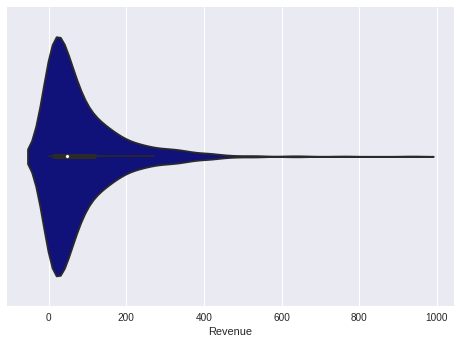

In [ ]:
sns.violinplot(x = charts['Revenue'])

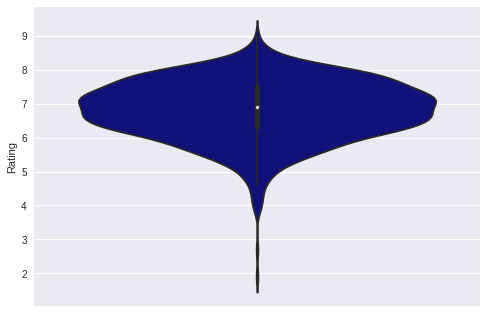

In [ ]:
sns.violinplot(y = charts['Rating'])

**Correlation**

In [ ]:
charts.corr() 

,Revenue,Rating
Revenue,1.000000,0.217106
Rating,0.217106,1.000000


**Heatmap**

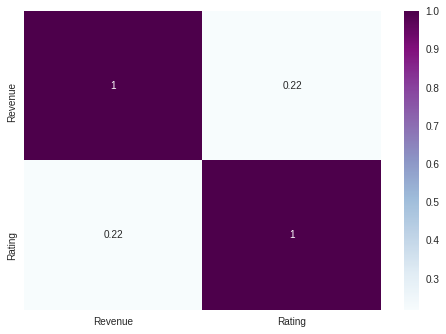

In [ ]:
sns.heatmap(charts.corr(),annot=True,cmap="BuPu")

There exists a positive correlation between the variables `Rating` and `Revenue`

**Stripplot**

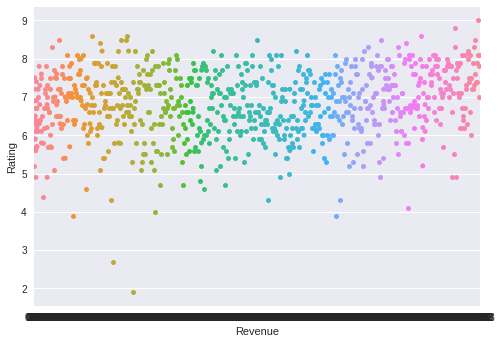

In [ ]:
sns.stripplot(x = 'Revenue', y = 'Rating', data = charts)

In [ ]:
#80-20 train-test percent split

trainDataset = charts.sample(frac=0.8, random_state=0) 
testDataset = charts.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     Revenue  Rating
423   106.37     6.2
164   167.01     8.0
743   171.03     7.6
259     2.27     7.1
781    12.28     6.5
    Revenue  Rating
10   234.02     7.5
12   532.17     7.9
20     7.22     6.7
28   113.08     6.2
33   363.02     8.0


In [ ]:
print(trainDataset.shape)
print(testDataset.shape)

(670, 2)
(168, 2)


In [ ]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     Revenue  Rating
423   106.37     6.2
164   167.01     8.0
743   171.03     7.6
259     2.27     7.1
781    12.28     6.5
    Revenue  Rating
10   234.02     7.5
12   532.17     7.9
20     7.22     6.7
28   113.08     6.2
33   363.02     8.0


In [ ]:
#removing the 'Rating' column and saving it into the labels variable

trainLabels = trainFeatures.pop('Rating')
testLabels = testFeatures.pop('Rating')

print(trainLabels.head())
print(testLabels.head())

423    6.2
164    8.0
743    7.6
259    7.1
781    6.5
Name: Rating, dtype: float64
10    7.5
12    7.9
20    6.7
28    6.2
33    8.0
Name: Rating, dtype: float64


In [ ]:
print(trainFeatures.head())
print(testFeatures.head())

     Revenue
423   106.37
164   167.01
743   171.03
259     2.27
781    12.28
    Revenue
10   234.02
12   532.17
20     7.22
28   113.08
33   363.02


In [ ]:
# univariate -> num(features) = 1

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [ ]:
numEpochs = 500
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/500
21/21 [==============================] - 1s 9ms/step - loss: 45.5646 - mae: 45.5646 - mse: 5565.5762 - val_loss: 46.4314 - val_mae: 46.4314 - val_mse: 6434.8481
Epoch 2/500
21/21 [==============================] - 0s 2ms/step - loss: 43.8781 - mae: 43.8781 - mse: 5164.4414 - val_loss: 44.6984 - val_mae: 44.6984 - val_mse: 5971.5571
Epoch 3/500
21/21 [==============================] - 0s 2ms/step - loss: 42.1541 - mae: 42.1541 - mse: 4772.7764 - val_loss: 42.9880 - val_mae: 42.9880 - val_mse: 5530.5005
Epoch 4/500
21/21 [==============================] - 0s 2ms/step - loss: 40.4765 - mae: 40.4765 - mse: 4417.7822 - val_loss: 41.2399 - val_mae: 41.2399 - val_mse: 5097.3198
Epoch 5/500
21/21 [==============================] - 0s 3ms/step - loss: 38.7678 - mae: 38.7678 - mse: 4066.4221 - val_loss: 39.5201 - val_mae: 39.5201 - val_mse: 4687.9248
Epoch 6/500
21/21 [==============================] - 0s 2ms/step - loss: 37.0864 - mae: 37.0864 - mse: 3732.7903 - val_loss: 37.8107 - 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


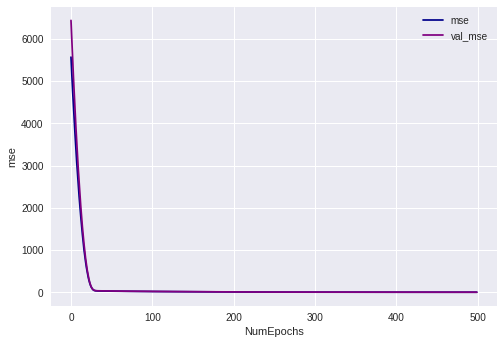

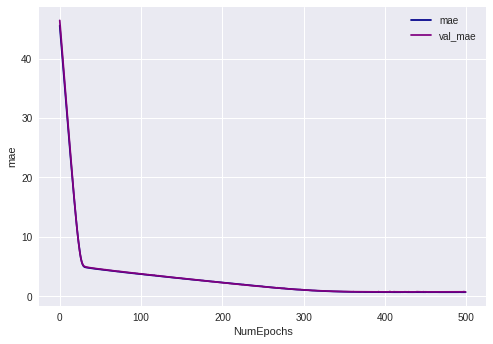

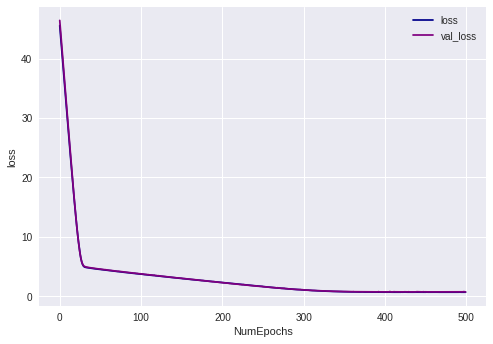

In [ ]:
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')